In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import missingno as msno
from collections import Counter as c
from sklearn.metrics  import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

In [63]:
data=pd.read_csv('chronickidneydisease.csv')

In [64]:
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
data.tail(10)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
390,390,52.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,52,6300,5.3,no,no,no,good,no,no,notckd
391,391,36.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,44,5800,6.3,no,no,no,good,no,no,notckd
392,392,57.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,46,6600,5.5,no,no,no,good,no,no,notckd
393,393,43.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7400,5.4,no,no,no,good,no,no,notckd
394,394,50.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,45,9500,4.6,no,no,no,good,no,no,notckd
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd
399,399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,53,6800,6.1,no,no,no,good,no,no,notckd


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [6]:
data.drop(['id'],axis=1,inplace=True)

In [7]:
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [8]:
data.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [9]:
data.columns=['age','blood_pressure','specific_gravity','albumin','sugar','red_blood_cells','pus_cells','pus_cell_clumps','bacteria','blood_glucose_random','blood_urea','serum_creatinine','sodium','potassium','hemogloblin','packed_cell_volume','white_blood_cell_count','red_blood_cell_count','hypertension','diabetesmillitus','coronory_artery_disease','appetite','pedal_edema','anemia','class']

In [10]:
data.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cells', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemogloblin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetesmillitus', 'coronory_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'class'],
      dtype='object')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cells                335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  hemogloblin              3

In [12]:
data['class'].unique

<bound method Series.unique of 0         ckd
1         ckd
2         ckd
3         ckd
4         ckd
        ...  
395    notckd
396    notckd
397    notckd
398    notckd
399    notckd
Name: class, Length: 400, dtype: object>

In [13]:
data['class'].unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [14]:
data['appetite'].unique()

array(['good', 'poor', nan], dtype=object)

In [15]:
data['class']=data['class'].replace("ckd\t","ckd")

In [16]:
data['class'].unique()

array(['ckd', 'notckd'], dtype=object)

In [17]:
columns = [column for column in data.columns if data[column].dtype == 'object']

In [18]:
print(columns)

['red_blood_cells', 'pus_cells', 'pus_cell_clumps', 'bacteria', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count', 'hypertension', 'diabetesmillitus', 'coronory_artery_disease', 'appetite', 'pedal_edema', 'anemia', 'class']


In [19]:
columns.remove('red_blood_cell_count')
columns.remove('packed_cell_volume')
columns.remove('white_blood_cell_count')

In [20]:
contcols = set(data.select_dtypes(exclude=['object']).columns)



In [21]:
print(contcols)

{'albumin', 'serum_creatinine', 'specific_gravity', 'age', 'sodium', 'potassium', 'hemogloblin', 'blood_glucose_random', 'blood_urea', 'blood_pressure', 'sugar'}


In [22]:
contcols.add('red_blood_cell_count')
contcols.add('packed_cell_volume')
contcols.add('white_blood_cell_count')

In [23]:
print(contcols)

{'albumin', 'serum_creatinine', 'specific_gravity', 'age', 'sodium', 'potassium', 'hemogloblin', 'packed_cell_volume', 'blood_glucose_random', 'blood_urea', 'red_blood_cell_count', 'white_blood_cell_count', 'blood_pressure', 'sugar'}


In [24]:
contcols.remove('albumin')
contcols.remove('sugar')


In [25]:
print(contcols)

{'serum_creatinine', 'specific_gravity', 'age', 'sodium', 'potassium', 'hemogloblin', 'packed_cell_volume', 'blood_glucose_random', 'blood_urea', 'red_blood_cell_count', 'white_blood_cell_count', 'blood_pressure'}


In [26]:
print(columns)

['red_blood_cells', 'pus_cells', 'pus_cell_clumps', 'bacteria', 'hypertension', 'diabetesmillitus', 'coronory_artery_disease', 'appetite', 'pedal_edema', 'anemia', 'class']


In [27]:
c(data['appetite'])

Counter({'good': 317, 'poor': 82, nan: 1})

In [28]:
c(data['coronory_artery_disease'])

Counter({'no': 362, 'yes': 34, '\tno': 2, nan: 2})

In [29]:
data['coronory_artery_disease']=data['coronory_artery_disease'].replace("\tno","no")

In [30]:
c(data['coronory_artery_disease'])

Counter({'no': 364, 'yes': 34, nan: 2})

In [31]:
c(data['diabetesmillitus'])

Counter({'no': 258, 'yes': 134, '\tno': 3, '\tyes': 2, nan: 2, ' yes': 1})

In [32]:
data['diabetesmillitus']=data['diabetesmillitus'].replace("\tno","no")

In [33]:
data['diabetesmillitus']=data['diabetesmillitus'].replace("\tyes","yes")

In [34]:
c(data['diabetesmillitus'])

Counter({'no': 261, 'yes': 136, nan: 2, ' yes': 1})

In [35]:
data['diabetesmillitus']=data['diabetesmillitus'].replace(" yes","yes")

In [36]:
c(data['diabetesmillitus'])

Counter({'no': 261, 'yes': 137, nan: 2})

In [37]:
data.isnull().any()

age                         True
blood_pressure              True
specific_gravity            True
albumin                     True
sugar                       True
red_blood_cells             True
pus_cells                   True
pus_cell_clumps             True
bacteria                    True
blood_glucose_random        True
blood_urea                  True
serum_creatinine            True
sodium                      True
potassium                   True
hemogloblin                 True
packed_cell_volume          True
white_blood_cell_count      True
red_blood_cell_count        True
hypertension                True
diabetesmillitus            True
coronory_artery_disease     True
appetite                    True
pedal_edema                 True
anemia                      True
class                      False
dtype: bool

In [38]:
data.isnull().sum()

age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cells                   65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
hemogloblin                 52
packed_cell_volume          70
white_blood_cell_count     105
red_blood_cell_count       130
hypertension                 2
diabetesmillitus             2
coronory_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
class                        0
dtype: int64

In [39]:
data.packed_cell_volume=pd.to_numeric(data.packed_cell_volume, errors='coerce')

In [40]:
data.white_blood_cell_count=pd.to_numeric(data.white_blood_cell_count, errors='coerce')

In [41]:
data.red_blood_cell_count=pd.to_numeric(data.red_blood_cell_count, errors='coerce')

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cells                335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  hemogloblin              3

In [43]:
data['blood_glucose_random'] = data['blood_glucose_random'].fillna(data['blood_glucose_random'].mean())

In [44]:
data.isnull().sum()

age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cells                   65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random         0
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
hemogloblin                 52
packed_cell_volume          71
white_blood_cell_count     106
red_blood_cell_count       131
hypertension                 2
diabetesmillitus             2
coronory_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
class                        0
dtype: int64

In [45]:
data['blood_pressure']=data['blood_pressure'].fillna(data['blood_pressure'].mean())
data['blood_urea']=data['blood_urea'].fillna(data['blood_urea'].mean())
data['hemogloblin']=data['hemogloblin'].fillna(data['hemogloblin'].mean())
data['packed_cell_volume']=data['packed_cell_volume'].fillna(data['packed_cell_volume'].mean())
data['potassium']=data['potassium'].fillna(data['potassium'].mean())
data['red_blood_cell_count']=data['red_blood_cell_count'].fillna(data['red_blood_cell_count'].mean())
data['serum_creatinine']=data['serum_creatinine'].fillna(data['serum_creatinine'].mean())
data['sodium']=data['sodium'].fillna(data['sodium'].mean())
data['white_blood_cell_count']=data['white_blood_cell_count'].fillna(data['white_blood_cell_count'].mean())

In [46]:
data.isnull().sum()

age                          9
blood_pressure               0
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cells                   65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random         0
blood_urea                   0
serum_creatinine             0
sodium                       0
potassium                    0
hemogloblin                  0
packed_cell_volume           0
white_blood_cell_count       0
red_blood_cell_count         0
hypertension                 2
diabetesmillitus             2
coronory_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
class                        0
dtype: int64

In [47]:
data['age']=data['age'].fillna(data['age'].mode()[0])
data['specific_gravity']=data['specific_gravity'].fillna(data['specific_gravity'].mode()[0])
data['albumin']=data['albumin'].fillna(data['albumin'].mode()[0])
data['sugar']=data['sugar'].fillna(data['sugar'].mode()[0])
data['red_blood_cells']=data['red_blood_cells'].fillna(data['red_blood_cells'].mode()[0])
data['pus_cells']=data['pus_cells'].fillna(data['pus_cells'].mode()[0])
data['pus_cell_clumps']=data['pus_cell_clumps'].fillna(data['pus_cell_clumps'].mode()[0])
data['bacteria']=data['bacteria'].fillna(data['bacteria'].mode()[0])
data['hypertension']=data['hypertension'].fillna(data['hypertension'].mode()[0])
data['diabetesmillitus']=data['diabetesmillitus'].fillna(data['diabetesmillitus'].mode()[0])
data['coronory_artery_disease']=data['coronory_artery_disease'].fillna(data['coronory_artery_disease'].mode()[0])
data['appetite']=data['appetite'].fillna(data['appetite'].mode()[0])
data['pedal_edema']=data['pedal_edema'].fillna(data['pedal_edema'].mode()[0])
data['anemia']=data['anemia'].fillna(data['anemia'].mode()[0])

In [48]:
data.isnull().sum()

age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cells                  0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
hemogloblin                0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetesmillitus           0
coronory_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
class                      0
dtype: int64

In [49]:
for i in columns:
    print("Label Encoding of :",i)
    Lei=LabelEncoder()
    print(c(data[i]))
    data[i]=Lei.fit_transform(data[i])
    print(c(data[i]))
    print("*"*100)

Label Encoding of : red_blood_cells
Counter({'normal': 353, 'abnormal': 47})
Counter({1: 353, 0: 47})
****************************************************************************************************
Label Encoding of : pus_cells
Counter({'normal': 324, 'abnormal': 76})
Counter({1: 324, 0: 76})
****************************************************************************************************
Label Encoding of : pus_cell_clumps
Counter({'notpresent': 358, 'present': 42})
Counter({0: 358, 1: 42})
****************************************************************************************************
Label Encoding of : bacteria
Counter({'notpresent': 378, 'present': 22})
Counter({0: 378, 1: 22})
****************************************************************************************************
Label Encoding of : hypertension
Counter({'no': 253, 'yes': 147})
Counter({0: 253, 1: 147})
****************************************************************************************************
La

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      400 non-null    float64
 1   blood_pressure           400 non-null    float64
 2   specific_gravity         400 non-null    float64
 3   albumin                  400 non-null    float64
 4   sugar                    400 non-null    float64
 5   red_blood_cells          400 non-null    int32  
 6   pus_cells                400 non-null    int32  
 7   pus_cell_clumps          400 non-null    int32  
 8   bacteria                 400 non-null    int32  
 9   blood_glucose_random     400 non-null    float64
 10  blood_urea               400 non-null    float64
 11  serum_creatinine         400 non-null    float64
 12  sodium                   400 non-null    float64
 13  potassium                400 non-null    float64
 14  hemogloblin              4

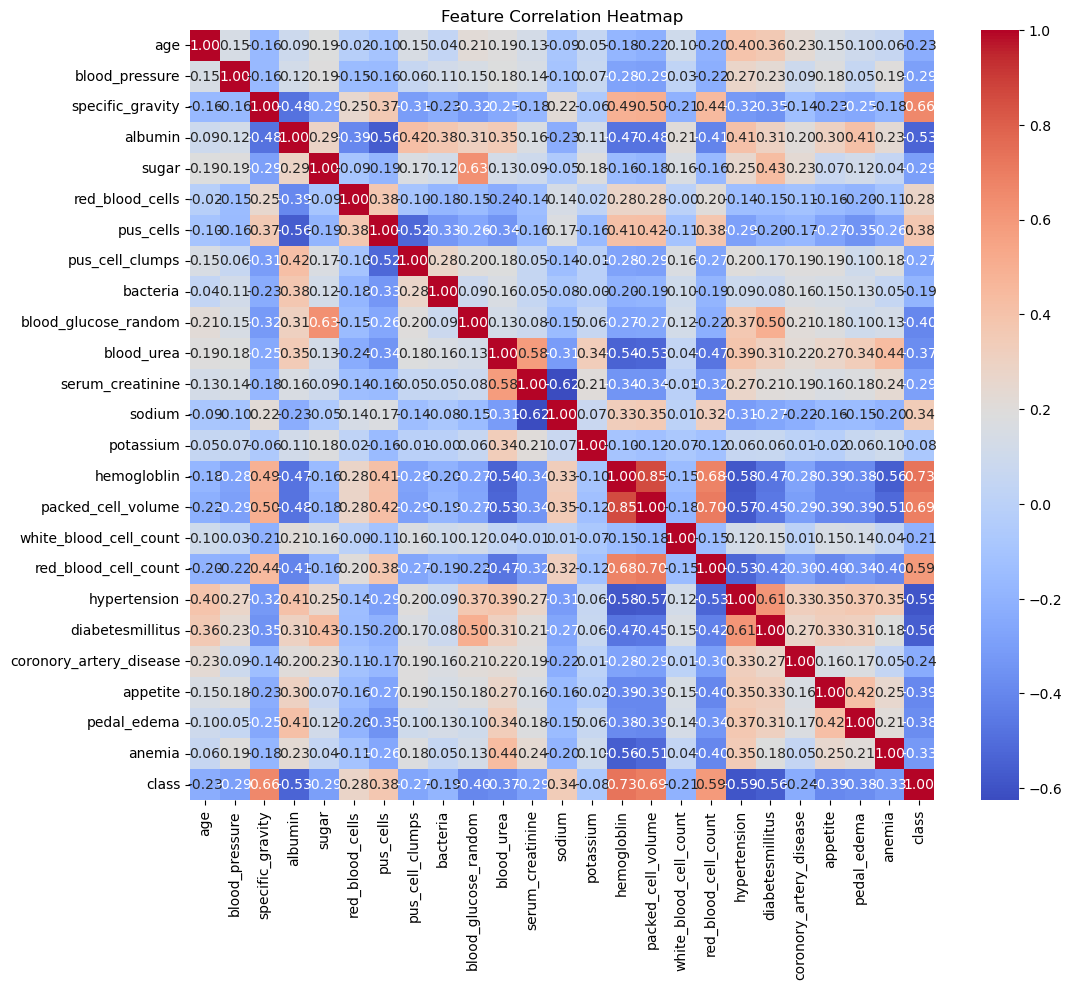

In [51]:
plt.figure(figsize=(12, 10))
corr = data.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [52]:
# Get correlation of all columns with 'class'
correlation = data.corr()['class'].drop('class')  # drop self-correlation

# Sort by absolute correlation
important_features = correlation.abs().sort_values(ascending=False)

# Show top N features (e.g. top 8)
print("Top correlated features with target (class):")
print(important_features.head(8))


Top correlated features with target (class):
hemogloblin             0.729628
packed_cell_volume      0.690060
specific_gravity        0.659504
red_blood_cell_count    0.590913
hypertension            0.590438
diabetesmillitus        0.559060
albumin                 0.531562
blood_glucose_random    0.401374
Name: class, dtype: float64


In [53]:
selcols=['hemogloblin','packed_cell_volume','specific_gravity','red_blood_cell_count','hypertension','diabetesmillitus','albumin','blood_glucose_random']
x=pd.DataFrame(data,columns=selcols)
y=pd.DataFrame(data,columns=['class'])
print(x.shape)
print(y.shape)

(400, 8)
(400, 1)


In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(320, 8)
(80, 8)
(320, 1)
(80, 1)


In [55]:
data.isnull().sum()

age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cells                  0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
hemogloblin                0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetesmillitus           0
coronory_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
class                      0
dtype: int64

In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

lgr = LogisticRegression()
lgr.fit(x_train_scaled, y_train.values.ravel())


LogisticRegression()

In [57]:
y_pred=lgr.predict(x_test_scaled)
print(y_pred)
c(y_pred)

[0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1
 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 1 1 0 0 0
 0 0 0 0 1 0]


Counter({0: 53, 1: 27})

In [58]:
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[53,  1],
       [ 0, 26]], dtype=int64)

In [59]:
accuracy_score(y_test,y_pred)

0.9875

In [60]:
pickle.dump(lgr,open('CKD.pkl','wb'))

In [61]:
pickle.dump(scaler,open('scalar.pkl','wb'))